<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Boston-House/blob/main/Battle_Infinity_Coin_Prediction_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Libraraies**

In [ ]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE
from keras.optimizers import Adam, SGD

### **Importing the Dataset**

In [ ]:
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download('IBAT-USD', start='2022-08-29', end=end_date,interval="1d")

[*********************100%%**********************]  1 of 1 completed


### **Exploring the Dataset**

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-29,0.004107,0.004516,0.004106,0.004408,0.004408,445622
2022-08-30,0.004407,0.005538,0.004375,0.005182,0.005182,821494
2022-08-31,0.005183,0.005535,0.004812,0.004820,0.004820,336867
2022-09-01,0.004820,0.005089,0.004503,0.004536,0.004536,425248
2022-09-02,0.004536,0.004599,0.004154,0.004189,0.004189,288878
...,...,...,...,...,...,...
2024-01-18,0.000617,0.000631,0.000572,0.000631,0.000631,2328
2024-01-19,0.000631,0.000637,0.000604,0.000625,0.000625,2271
2024-01-20,0.000625,0.000625,0.000582,0.000601,0.000601,1327


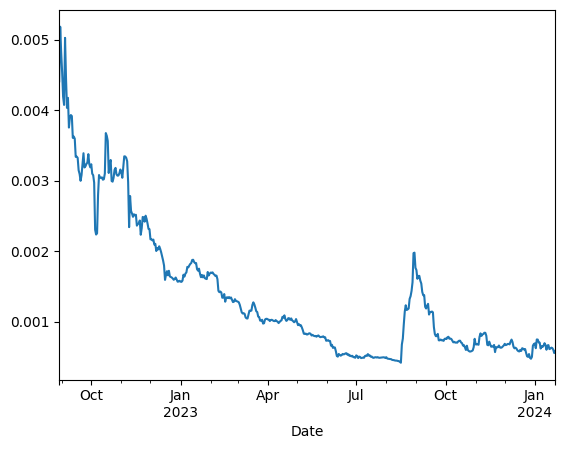

In [ ]:
import matplotlib.pyplot as plt
df['Adj Close'].plot()
plt.show()

### **Dropping the Close Column**

In [ ]:
df.drop('Close', axis=1,inplace=True)

In [ ]:
df=df[['Open','High','Low','Adj Close','Volume']].reset_index()
df.columns=['Date','Open','High','Low','Adj Close','Volume']

In [ ]:
df.describe()

,Open,High,Low,Adj Close,Volume
count,512.000000,512.000000,512.000000,512.000000,5.120000e+02
mean,0.001387,0.001442,0.001333,0.001380,1.617237e+05
std,0.000982,0.001044,0.000929,0.000975,2.248608e+05
min,0.000415,0.000428,0.000404,0.000417,3.880000e+02
25%,0.000662,0.000688,0.000634,0.000661,6.932725e+04
50%,0.001021,0.001040,0.001002,0.001019,1.238185e+05
75%,0.001709,0.001771,0.001651,0.001707,1.653355e+05
max,0.005183,0.005538,0.004812,0.005182,1.902688e+06


In [ ]:
df

,Date,Open,High,Low,Adj Close,Volume
0,2022-08-29,0.004107,0.004516,0.004106,0.004408,445622
1,2022-08-30,0.004407,0.005538,0.004375,0.005182,821494
2,2022-08-31,0.005183,0.005535,0.004812,0.004820,336867
3,2022-09-01,0.004820,0.005089,0.004503,0.004536,425248
4,2022-09-02,0.004536,0.004599,0.004154,0.004189,288878
...,...,...,...,...,...,...
507,2024-01-18,0.000617,0.000631,0.000572,0.000631,2328
508,2024-01-19,0.000631,0.000637,0.000604,0.000625,2271
509,2024-01-20,0.000625,0.000625,0.000582,0.000601,1327
510,2024-01-21,0.000601,0.000604,0.000551,0.000554,794


### **Missing Value**

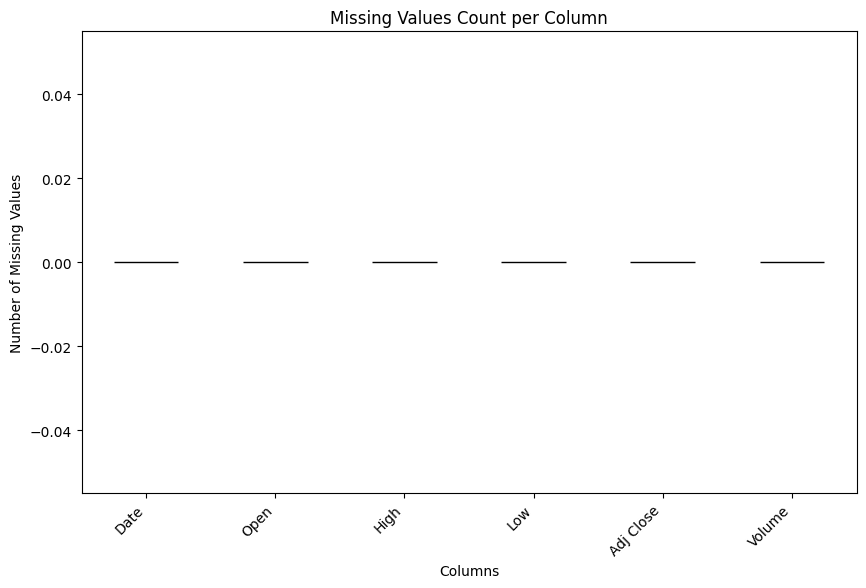

In [ ]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Correlation Identification**

<ipython-input-11-a7434eca7f55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

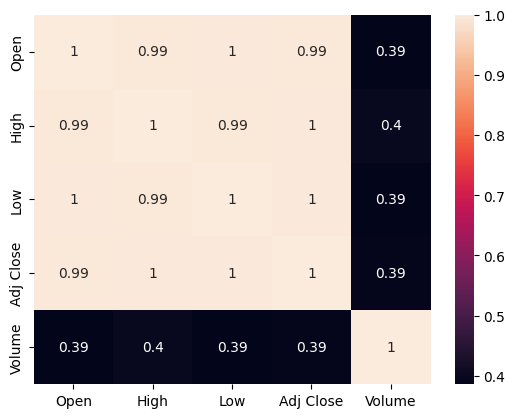

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [ ]:
corr_matrix = df.corr()['Adj Close']
corr_matrix

<ipython-input-12-34b845c5d491>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()['Adj Close']


Open         0.993325
High         0.995842
Low          0.996736
Adj Close    1.000000
Volume       0.391531
Name: Adj Close, dtype: float64

### **Plotting the graph**

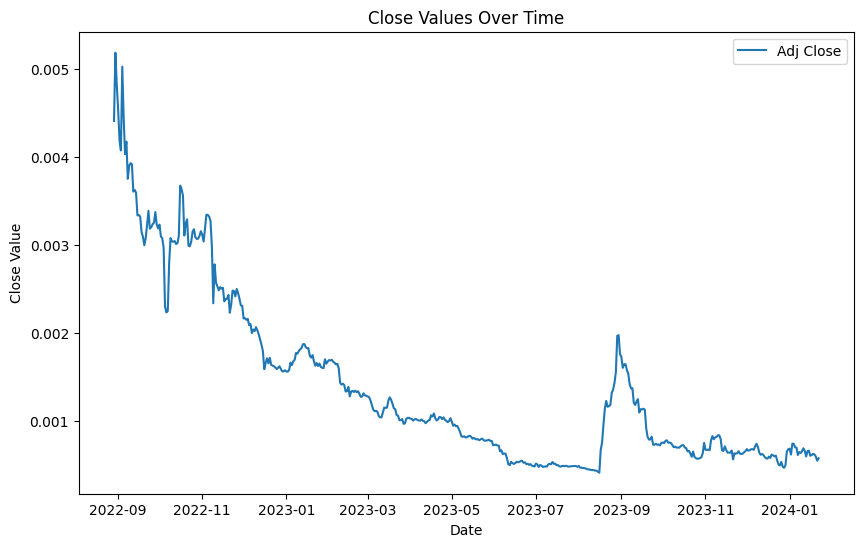

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the 'Close' values against the 'Date'
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.title('Close Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [ ]:
df.shape

(512, 6)

In [ ]:
df['Adj Close'] = df['Adj Close'].astype(float)

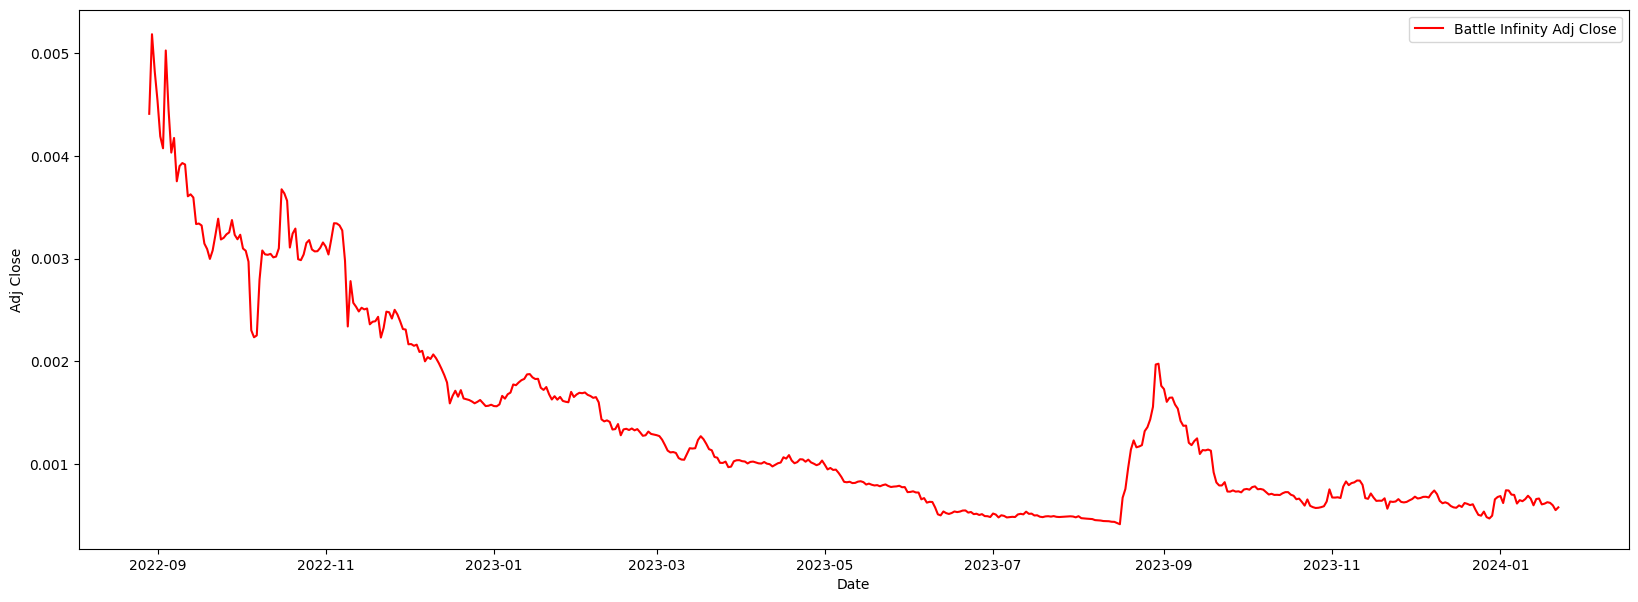

In [ ]:
df['Adj Close'] = df['Adj Close'].astype(float)
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Adj Close'].values, label = 'Battle Infinity Adj Close', color = 'red')
#plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

### **Splitting**

In [ ]:
# Training 80%
# Validation 20%

num_shape = int(0.8*df.shape[0])

train = df.iloc[:num_shape, 1:2].values
val = df.iloc[num_shape:, 1:2].values

In [ ]:
train

array([[0.004107],
       [0.004407],
       [0.005183],
       [0.00482 ],
       [0.004536],
       [0.004189],
       [0.004073],
       [0.005024],
       [0.00445 ],
       [0.004031],
       [0.004173],
       [0.003753],
       [0.003901],
       [0.003929],
       [0.003916],
       [0.003606],
       [0.003588],
       [0.003594],
       [0.00334 ],
       [0.003339],
       [0.003322],
       [0.003148],
       [0.003093],
       [0.002994],
       [0.00308 ],
       [0.003229],
       [0.003388],
       [0.003189],
       [0.003201],
       [0.003225],
       [0.003252],
       [0.003381],
       [0.003227],
       [0.003186],
       [0.003232],
       [0.003096],
       [0.003076],
       [0.00297 ],
       [0.0023  ],
       [0.002235],
       [0.002258],
       [0.002795],
       [0.003079],
       [0.003041],
       [0.003037],
       [0.003046],
       [0.003012],
       [0.00302 ],
       [0.0031  ],
       [0.003674],
       [0.003634],
       [0.003562],
       [0.00

In [ ]:
val

array([[0.000703],
       [0.000704],
       [0.000701],
       [0.000718],
       [0.000729],
       [0.000729],
       [0.000704],
       [0.000694],
       [0.00066 ],
       [0.000666],
       [0.000634],
       [0.000602],
       [0.000658],
       [0.000597],
       [0.000584],
       [0.000575],
       [0.000577],
       [0.000583],
       [0.000592],
       [0.000638],
       [0.000756],
       [0.000677],
       [0.000676],
       [0.000679],
       [0.000673],
       [0.000783],
       [0.000833],
       [0.000797],
       [0.000816],
       [0.000824],
       [0.000842],
       [0.000841],
       [0.0008  ],
       [0.00067 ],
       [0.000664],
       [0.000716],
       [0.000676],
       [0.000645],
       [0.000646],
       [0.000645],
       [0.000669],
       [0.000567],
       [0.000638],
       [0.000634],
       [0.000638],
       [0.000661],
       [0.000634],
       [0.000629],
       [0.000634],
       [0.000649],
       [0.000662],
       [0.000685],
       [0.00

In [ ]:
# Scaling our features using normalization.
# Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently.

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

In [ ]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

In [ ]:
X_train

array([[[ 2.4936144 ],
        [ 2.78860429],
        [ 3.55164522],
        ...,
        [ 1.4444338 ],
        [ 1.55652991],
        [ 1.58209567]],

       [[ 2.78860429],
        [ 3.55164522],
        [ 3.19470721],
        ...,
        [ 1.55652991],
        [ 1.58209567],
        [ 1.4926154 ]],

       [[ 3.55164522],
        [ 3.19470721],
        [ 2.91545024],
        ...,
        [ 1.58209567],
        [ 1.4926154 ],
        [ 1.47393279]],

       ...,

       [[-1.09936281],
        [-1.10427929],
        [-1.1052626 ],
        ...,
        [-0.80043967],
        [-0.79748975],
        [-0.80535615]],

       [[-1.10427929],
        [-1.1052626 ],
        [-1.10624591],
        ...,
        [-0.79748975],
        [-0.80535615],
        [-0.82797204]],

       [[-1.1052626 ],
        [-1.10624591],
        [-1.11116239],
        ...,
        [-0.80535615],
        [-0.82797204],
        [-0.85058794]]])

In [ ]:
y_train

array([ 1.49261540e+00,  1.47393279e+00,  1.47589940e+00,  1.50736478e+00,
        1.55947983e+00,  1.52014777e+00,  1.44443380e+00,  1.57422921e+00,
        1.75122315e+00,  1.73745707e+00,  1.72074085e+00,  1.67452587e+00,
        1.38346921e+00,  7.48257527e-01,  1.18582582e+00,  9.86216052e-01,
        9.43934069e-01,  9.01652315e-01,  9.43934069e-01,  9.19351616e-01,
        9.28201382e-01,  7.78739823e-01,  8.01355661e-01,  8.06272197e-01,
        8.46587337e-01,  6.50910796e-01,  7.34491226e-01,  8.95752471e-01,
        8.94769164e-01,  8.33804572e-01,  9.14435080e-01,  8.71170019e-01,
        8.05288890e-01,  7.31541304e-01,  7.26624768e-01,  5.86996282e-01,
        5.86996282e-01,  5.65363751e-01,  5.76179902e-01,  5.12265617e-01,
        5.25048383e-01,  4.22785344e-01,  4.63100483e-01,  4.45401182e-01,
        4.88666243e-01,  4.53267640e-01,  4.02135891e-01,  3.52970986e-01,
        2.89056472e-01,  2.21208844e-01,  1.66824227e-02,  8.84632801e-02,
        1.41561529e-01,  

In [ ]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(100))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(units=1))

# Model Compilation
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
LSTM_model.fit(X_train, y_train, epochs=1300, batch_size=64, verbose=1)

# Validation Data Preparation
df_volume = np.vstack((train, val))
inputs = df_volume[df_volume.shape[0] - val.shape[0] - window:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# Creating Sequences for Validation
num_2 = df_volume.shape[0] - num_shape + window
X_val = [np.reshape(inputs[i - window:i, 0], (window, 1)) for i in range(window, num_2)]
X_val = np.stack(X_val)

# Model Prediction on Validation Set
LSTM_predict = LSTM_model.predict(X_val)
LSTM_predict = scaler.inverse_transform(LSTM_predict)

Epoch 1/1300
6/6 [==============================] - 6s 17ms/step - loss: 0.1965
Epoch 2/1300
6/6 [==============================] - 0s 15ms/step - loss: 0.0555
Epoch 3/1300
6/6 [==============================] - 0s 13ms/step - loss: 0.0518
Epoch 4/1300
6/6 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 5/1300
6/6 [==============================] - 0s 12ms/step - loss: 0.0304
Epoch 6/1300
6/6 [==============================] - 0s 13ms/step - loss: 0.0271
Epoch 7/1300
6/6 [==============================] - 0s 12ms/step - loss: 0.0269
Epoch 8/1300
6/6 [==============================] - 0s 13ms/step - loss: 0.0251
Epoch 9/1300
6/6 [==============================] - 0s 12ms/step - loss: 0.0234
Epoch 10/1300
6/6 [==============================] - 0s 12ms/step - loss: 0.0210
Epoch 11/1300
6/6 [==============================] - 0s 13ms/step - loss: 0.0218
Epoch 12/1300
6/6 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 13/1300
6/6 [==================

LSTM MSE: 2.3134634103446527e-09
LSTM MAE: 3.442011922778724e-05


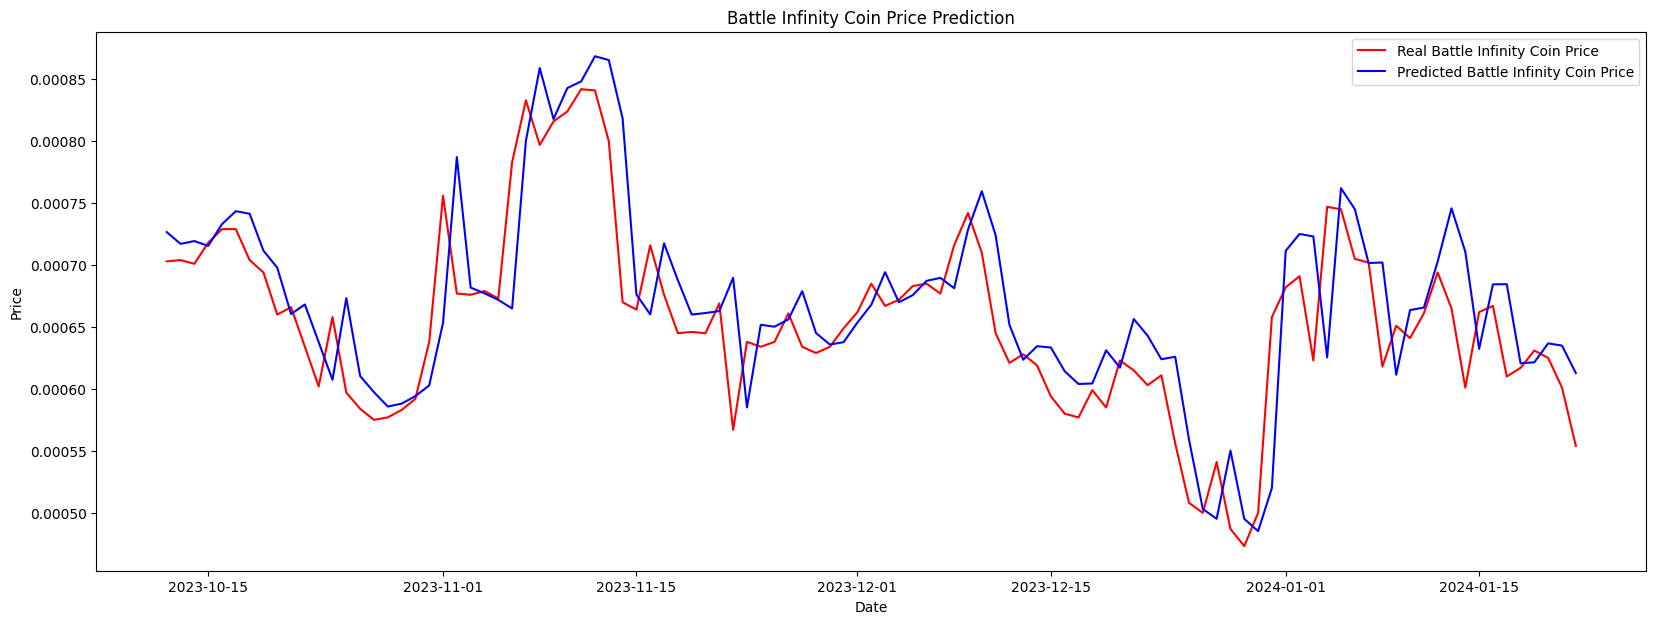

In [ ]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("LSTM MSE:", mean_squared_error(val, LSTM_predict))
print("LSTM MAE:", mean_absolute_error(val, LSTM_predict))

# Plotting Results
plt.figure(figsize=(20, 7))
plt.plot(df['Date'].values[num_shape:], df_volume[num_shape:], color='red', label='Real Battle Infinity Coin Price')
plt.plot(df['Date'][-LSTM_predict.shape[0]:].values, LSTM_predict, color='blue', label='Predicted Battle Infinity Coin Price')
plt.title('Battle Infinity Coin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
r_squared = 1 - mean_squared_error(val, LSTM_predict) / np.var(val)

print("LSTM R-squared:", r_squared)

LSTM R-squared: 0.5702573073085488


In [ ]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Next 20 Day Prediction**

In [ ]:
LSTM_pred_ = LSTM_predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, LSTM_pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]

    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = scaler.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    LSTM_predict_ = LSTM_model.predict(X_test_)
    LSTM_pred_ = scaler.inverse_transform(LSTM_predict_)
    prediction_full.append(LSTM_pred_[-1][0])
    df_copy = df_[j:]

4/4 [==============================] - 0s 5ms/step


In [ ]:
LSTM_prediction_full_new = np.vstack((LSTM_predict, np.array(prediction_full).reshape(-1,1)))

In [ ]:
df_date = df[['Date']]

for h in range(20):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)
df_date = df_date.reset_index(drop=True)

<ipython-input-30-c275f3152117>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-30-c275f3152117>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-30-c275f3152117>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-30-c275f3152117>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-30-c275f3152117>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


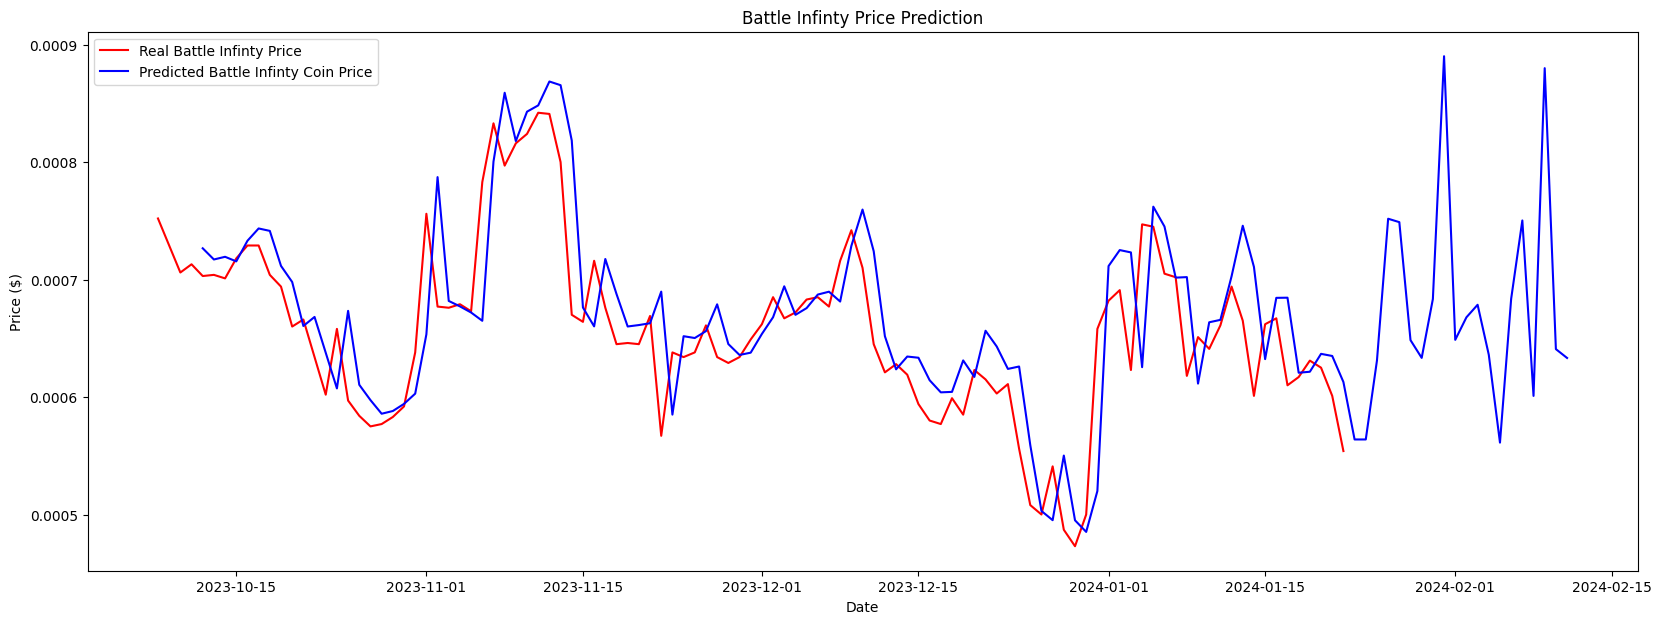

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[405:], df_volume[405:], color = 'red', label = 'Real Battle Infinty Price')
plt.plot(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new, color = 'blue', label = 'Predicted Battle Infinty Coin Price')
#plt.xticks(np.arange(100,df[1700:].shape[0],200))
plt.title('Battle Infinty Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### Next 1 Week

4/4 [==============================] - 0s 5ms/step


<ipython-input-32-c13650ee667c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-32-c13650ee667c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-32-c13650ee667c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-32-c13650ee667c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-32-c13650ee667c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

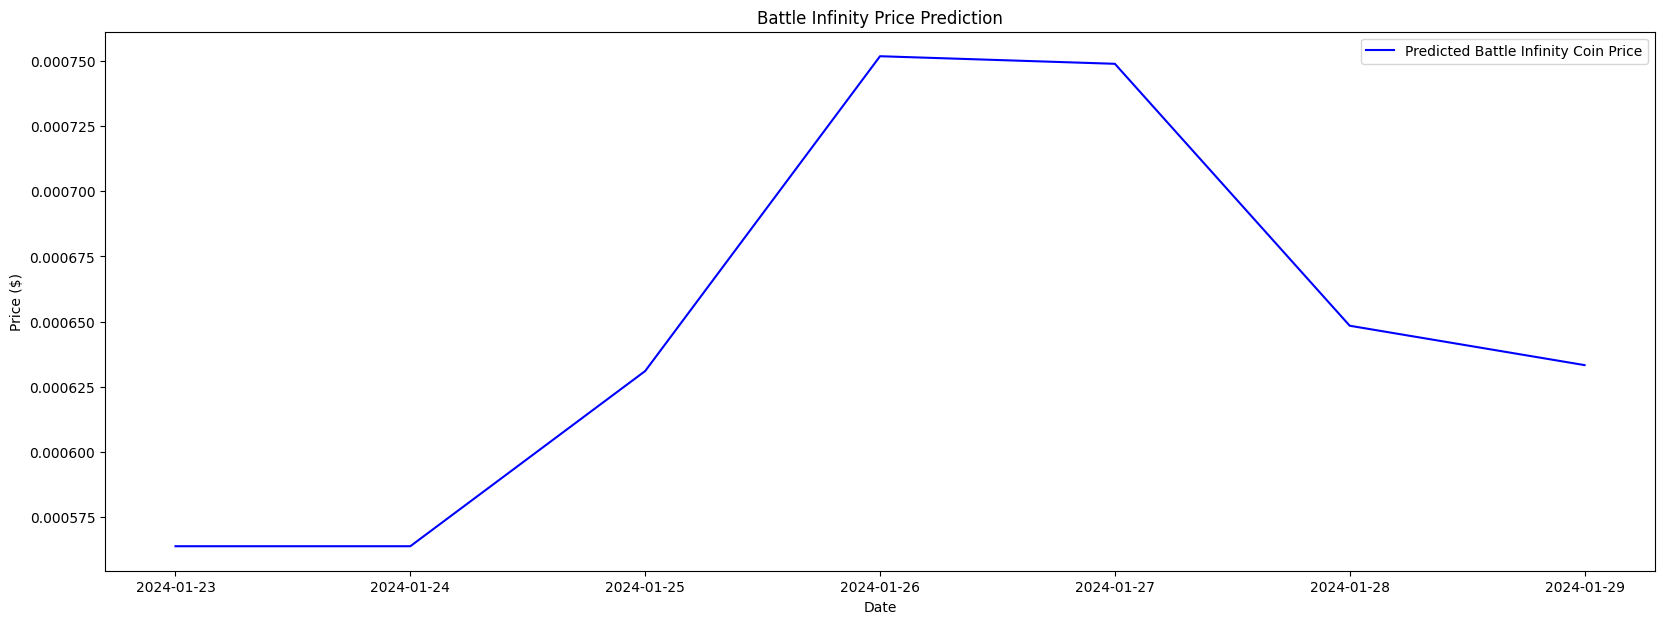

In [ ]:
LSTM_pred_ = LSTM_predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(7):  # Update loop range to 7 for next 7 days
    df_ = np.vstack((df_copy, LSTM_pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]

    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]

    if inputs_.shape[0] < window:
        # Handle case where there are not enough elements for reshaping
        print(f"Not enough elements to reshape at iteration {j}")
        break

    inputs_ = inputs_.reshape(-1, 1)
    inputs_ = scaler.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k - window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    LSTM_predict_ = LSTM_model.predict(X_test_)
    LSTM_pred_ = scaler.inverse_transform(LSTM_predict_)
    prediction_full.append(LSTM_pred_[-1][0])
    df_copy = df_[j:]

LSTM_prediction_full_new = np.array(prediction_full).reshape(-1, 1)

df_date = df[['Date']]

for h in range(7):  # Update range to add 7 days
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)

df_date = df_date.reset_index(drop=True)

plt.figure(figsize=(20, 7))
plt.plot(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new, color='blue', label='Predicted Battle Infinity Coin Price')
plt.title('Battle Infinity Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


### **Next 30 Day Prediction**

4/4 [==============================] - 0s 6ms/step


<ipython-input-33-00cf9679e7b4>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-33-00cf9679e7b4>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-33-00cf9679e7b4>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-33-00cf9679e7b4>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-33-00cf9679e7b4>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

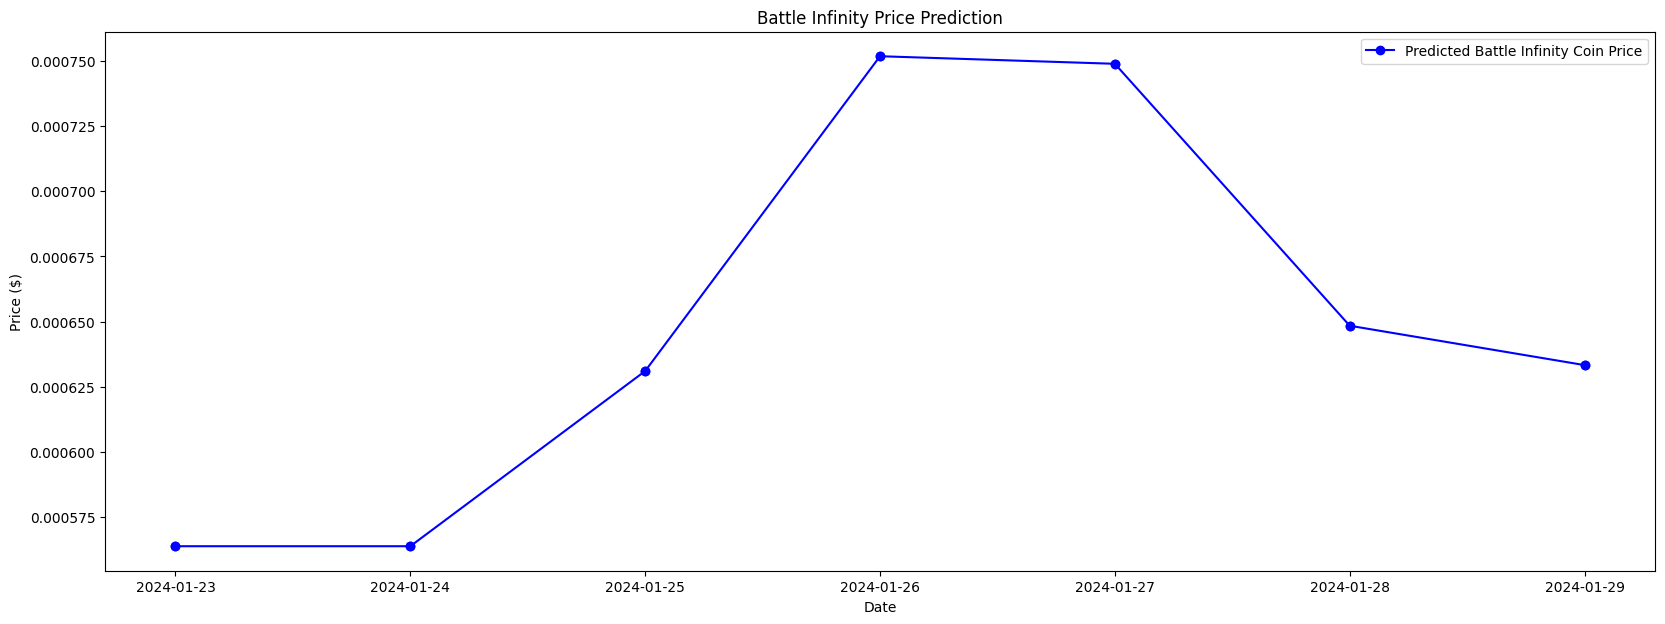

In [ ]:
# Assuming you have defined the necessary variables, models, and data

# Initialize LSTM_pred_ with the last prediction from the previous data
LSTM_pred_ = LSTM_predict[-1].copy()

# List to store predicted values
prediction_full = []

# Set the window size
window = 60

# Create a copy of the DataFrame
df_copy = df.iloc[:, 1:2][1:].values

# Iterate over the next 7 days for prediction
for j in range(7):
    # Stack the current prediction to the copy of the DataFrame
    df_ = np.vstack((df_copy, LSTM_pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]

    df_volume_ = np.vstack((train_, test_))

    # Prepare inputs for prediction
    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]

    # Check if there are enough elements for reshaping
    if inputs_.shape[0] < window:
        print(f"Not enough elements to reshape at iteration {j}")
        break

    inputs_ = inputs_.reshape(-1, 1)
    inputs_ = scaler.transform(inputs_)

    X_test_2 = []

    # Reshape inputs for the model
    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k - window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)

    # Make predictions using the LSTM model
    LSTM_predict_ = LSTM_model.predict(X_test_)

    # Inverse transform the predictions
    LSTM_pred_ = scaler.inverse_transform(LSTM_predict_)
    prediction_full.append(LSTM_pred_[-1][0])

    # Update the DataFrame copy for the next iteration
    df_copy = df_[j:]

# Convert the predicted values to a numpy array
LSTM_prediction_full_new = np.array(prediction_full).reshape(-1, 1)

# Extract dates from the original DataFrame
df_date = df[['Date']]

# Add dates for the next 7 days
for h in range(7):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)

# Reset the index of the DataFrame
df_date = df_date.reset_index(drop=True)



plt.figure(figsize=(20, 7))
plt.plot(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new, 'o-', color='blue', label='Predicted Battle Infinity Coin Price')
plt.title('Battle Infinity Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()

# Add bullet points on the graph without labels
for date, value in zip(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new):
    plt.scatter(date, value, marker='o', color='blue')

plt.show()




4/4 [==============================] - 0s 5ms/step


<ipython-input-34-84fb6d733c5e>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-34-84fb6d733c5e>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-34-84fb6d733c5e>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-34-84fb6d733c5e>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-34-84fb6d733c5e>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

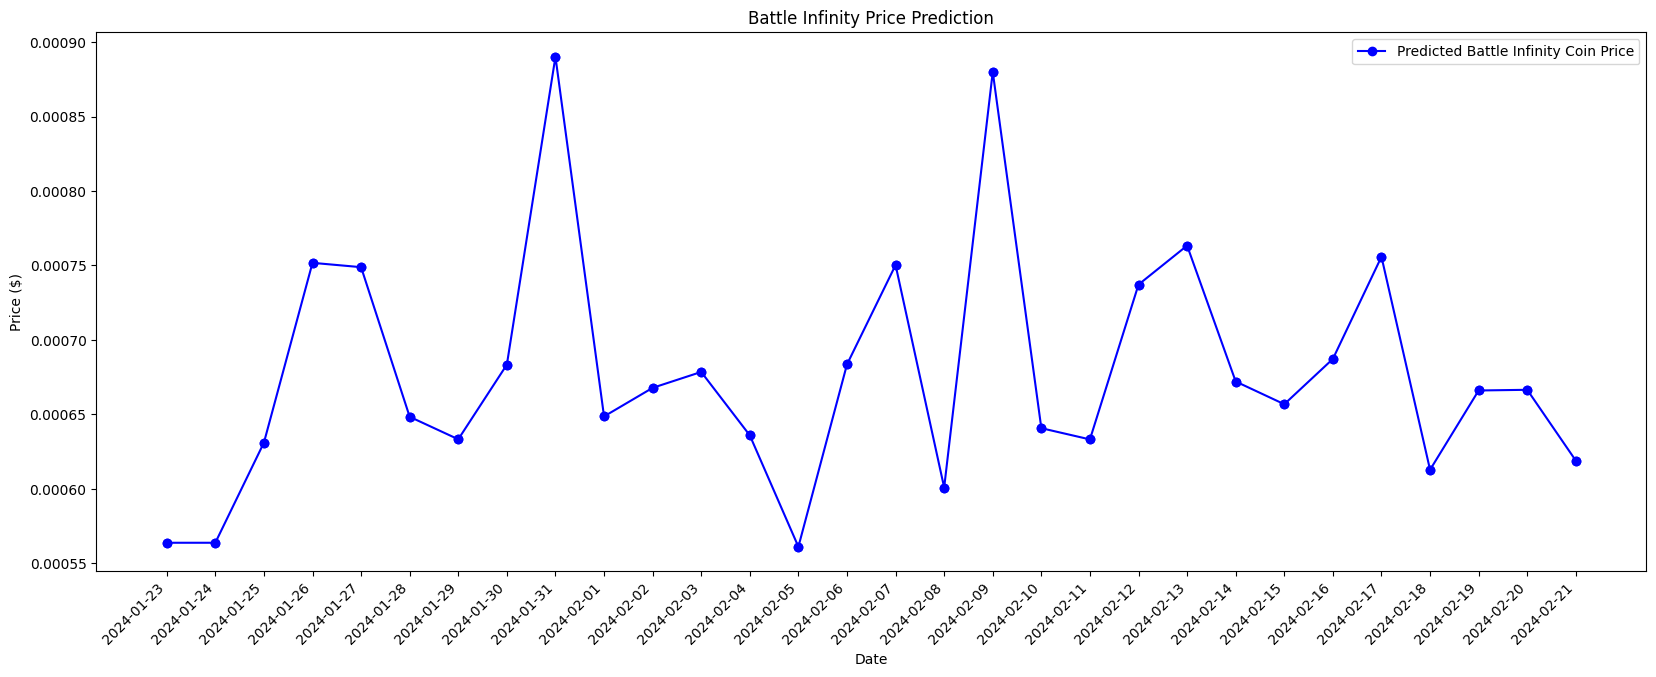

In [ ]:
# Assuming you have defined the necessary variables, models, and data

# Initialize LSTM_pred_ with the last prediction from the previous data
LSTM_pred_ = LSTM_predict[-1].copy()

# List to store predicted values
prediction_full = []

# Set the window size
window = 60

# Create a copy of the DataFrame
df_copy = df.iloc[:, 1:2][1:].values

# Iterate over the next 30 days for prediction
for j in range(30):
    # Stack the current prediction to the copy of the DataFrame
    df_ = np.vstack((df_copy, LSTM_pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]

    df_volume_ = np.vstack((train_, test_))

    # Prepare inputs for prediction
    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]

    # Check if there are enough elements for reshaping
    if inputs_.shape[0] < window:
        print(f"Not enough elements to reshape at iteration {j}")
        break

    inputs_ = inputs_.reshape(-1, 1)
    inputs_ = scaler.transform(inputs_)

    X_test_2 = []

    # Reshape inputs for the model
    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k - window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)

    # Make predictions using the LSTM model
    LSTM_predict_ = LSTM_model.predict(X_test_)

    # Inverse transform the predictions
    LSTM_pred_ = scaler.inverse_transform(LSTM_predict_)
    prediction_full.append(LSTM_pred_[-1][0])

    # Update the DataFrame copy for the next iteration
    df_copy = df_[j:]

# Convert the predicted values to a numpy array
LSTM_prediction_full_new = np.array(prediction_full).reshape(-1, 1)

# Extract dates from the original DataFrame
df_date = df[['Date']]

# Add dates for the next 30 days
for h in range(30):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)

# Reset the index of the DataFrame
df_date = df_date.reset_index(drop=True)

plt.figure(figsize=(20, 7))
plt.plot(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new, 'o-', color='blue', label='Predicted Battle Infinity Coin Price')
plt.title('Battle Infinity Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Tilt x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.legend()

# Add bullet points on the graph without labels
for date, value in zip(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new):
    plt.scatter(date, value, marker='o', color='blue')

plt.show()


### 1 Year Predictions

5/5 [==============================] - 0s 5ms/step


<ipython-input-35-36546adebc05>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-35-36546adebc05>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-35-36546adebc05>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-35-36546adebc05>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-35-36546adebc05>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

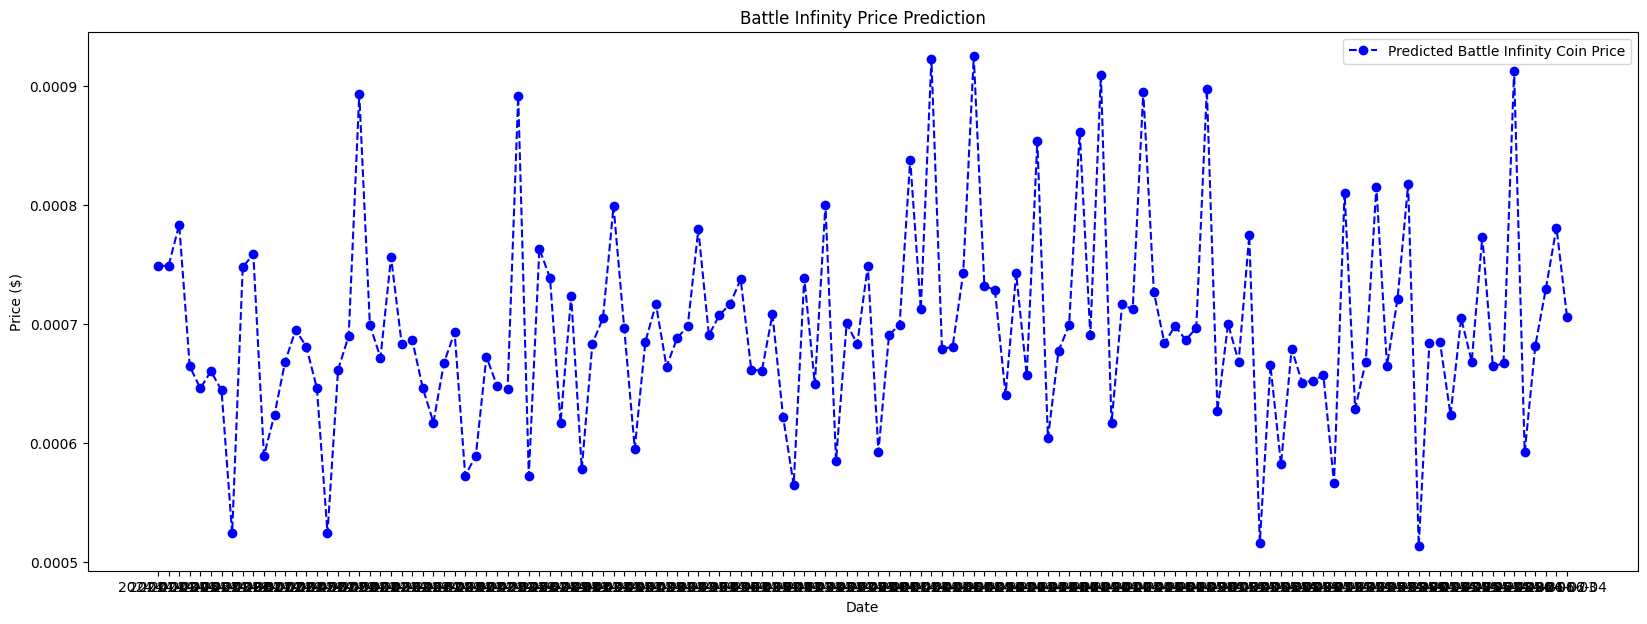

In [ ]:
LSTM_pred_ = LSTM_predict[-1].copy()
prediction_full = []
window = 30  # Adjust the window size

# Determine the maximum possible loop range based on available data
max_iterations = min(365, num_2 - window + 1)

for j in range(max_iterations):
    df_ = np.vstack((df_copy, LSTM_pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]

    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]

    if inputs_.shape[0] < window:
        # Handle case where there are not enough elements for reshaping
        print(f"Not enough elements to reshape at iteration {j}")
        break

    inputs_ = inputs_.reshape(-1, 1)
    inputs_ = scaler.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        # Check if there are enough elements to reshape
        if k - window >= 0 and inputs_[k - window:k, 0].shape[0] == window:
            X_test_3 = np.reshape(inputs_[k - window:k, 0], (window, 1))
            X_test_2.append(X_test_3)

    if not X_test_2:
        # Skip iteration if X_test_2 is empty
        print(f"Skipping iteration {j} due to insufficient elements")
        continue

    X_test_ = np.stack(X_test_2)
    LSTM_predict_ = LSTM_model.predict(X_test_)
    LSTM_pred_ = scaler.inverse_transform(LSTM_predict_)
    prediction_full.append(LSTM_pred_[-1][0])
    df_copy = df_[j:]

LSTM_prediction_full_new = np.array(prediction_full).reshape(-1, 1)

df_date = df[['Date']]

for h in range(max_iterations):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)

df_date = df_date.reset_index(drop=True)

plt.figure(figsize=(20, 7))
plt.plot(df_date['Date'][-LSTM_prediction_full_new.shape[0]:].values, LSTM_prediction_full_new, color='blue', marker='o', linestyle='dashed', label='Predicted Battle Infinity Coin Price')
plt.title('Battle Infinity Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
# Filter the original DataFrame df for the year 2023
df_2023 = df[df['Date'].dt.year == 2023]

# Calculate the average of the 'Price' column for the year 2023
average_2023_original = df_2023['Adj Close'].mean()

# Print the average
print(f"Average original price for 2023: {average_2023_original}")


Average original price for 2023: 0.0009285589040588741


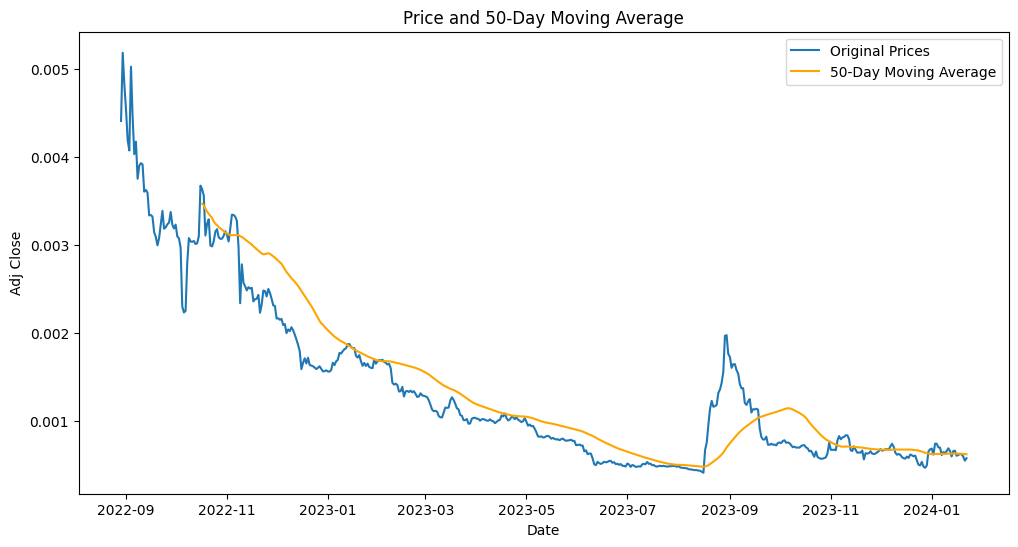

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate the 50-day simple moving average
df['50_day_MA'] = df['Adj Close'].rolling(window=50).mean()

# Plotting the original prices and the 50-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Original Prices')
plt.plot(df['Date'], df['50_day_MA'], label='50-Day Moving Average', color='orange')

plt.title('Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


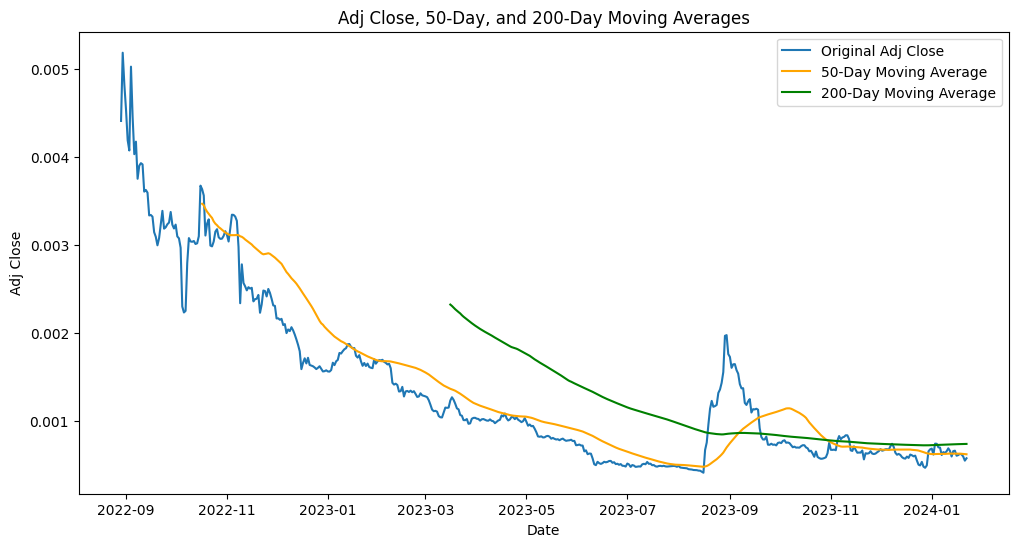

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame 'df' with a 'price' column
# If not, you can replace this with your actual DataFrame

# Calculate the 50-day and 200-day simple moving averages
df['50_day_MA'] = df['Adj Close'].rolling(window=50).mean()
df['200_day_MA'] = df['Adj Close'].rolling(window=200).mean()

# Plotting the original prices, 50-day, and 200-day moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Original Adj Close')
plt.plot(df['Date'], df['50_day_MA'], label='50-Day Moving Average', color='orange')
plt.plot(df['Date'], df['200_day_MA'], label='200-Day Moving Average', color='green')

plt.title('Adj Close, 50-Day, and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()
